<a href="https://colab.research.google.com/github/Ismail-Amodu/Biginner-Python-Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [4]:
# Loading dataset into pandas dataframe
car_dataset = pd.read_csv('/content/car_dataset.csv')

In [5]:
# Inspecting the first five rows of the dataframe
car_dataset.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [6]:
# Checking the number of rows and columns
car_dataset.shape

(2095, 14)

In [7]:
# getting information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [8]:
# Checking the number of missing values
car_dataset.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

In [9]:
# Checking distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel    1075
Petrol    1000
CNG         19
LPG          1
Name: count, dtype: int64
seller_type
Individual          1919
Dealer               169
Trustmark Dealer       7
Name: count, dtype: int64
transmission
Manual       1996
Automatic      99
Name: count, dtype: int64


ENCODING THE CATEGORICAL DATA

In [10]:
# Encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1, 'CNG':2, 'LPG':3}}, inplace=True)

# Encoding "Fuel_Type" Column
car_dataset.replace({'seller_type':{ 'Individual':0, 'Dealer':1,'Trustmark Dealer':2,}}, inplace=True)

# Encoding "Fuel_Type" Column
car_dataset.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

# Encoding "owner" Column
car_dataset.replace({'owner':{'First Owner':0, 'Second Owner':1,'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

In [11]:
car_dataset.owner.value_counts()

owner
0    1325
1     586
2     146
3      37
4       1
Name: count, dtype: int64

In [12]:
# Checking the effect of the changes made on the dataset
car_dataset.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,0,0,0,0,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,0,0,0,0,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,1,0,0,0,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,0,0,0,0,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,0,0,0,0,5,68.10,kmpl,20.00,1399


In [13]:
# Splitting data and target
X = car_dataset.drop(['Unnamed: 0','name', 'selling_price','Mileage Unit'], axis=1)
Y = car_dataset['selling_price']

In [14]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  seats  \
0     2014     145500     0            0             0      0      5   
1     2010     127000     0            0             0      0      5   
2     2017      45000     1            0             0      0      5   
3     2011      90000     0            0             0      0      5   
4     2013     169000     0            0             0      0      5   
...    ...        ...   ...          ...           ...    ...    ...   
2090  2017      12000     1            0             0      0      5   
2091  2014      50000     0            0             0      0      5   
2092  2011      73000     1            0             0      0      5   
2093  2017      80000     1            0             0      0      5   
2094  2014      80000     0            0             0      1      5   

      max_power (in bph)  Mileage  Engine (CC)  
0                  74.00    23.40         1248  
1                  90.00    23.00    

In [15]:
print(Y)

0       450000
1       225000
2       440000
3       350000
4       200000
         ...  
2090    425000
2091    425000
2092    200000
2093    360000
2094    475000
Name: selling_price, Length: 2095, dtype: int64


In [16]:
# Splitting dataset into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)

In [17]:
X_train.shape


(1676, 10)

In [18]:
Y_train.shape

(1676,)

MODEL TRAINING: Linear Regression Algorithm

In [19]:
# Loading the linear regression model
Linear_Regr_model = LinearRegression()

# training the model
Linear_Regr_model.fit(X_train, Y_train)

LinearRegression()

MODEL TRAINING: Lasso Regression Algorithm

In [20]:
# Loading the lasso regression model
Lasso_Regr_model = Lasso()

# training the model
Lasso_Regr_model.fit(X_train, Y_train)

Lasso()

**MODEL EVALUATION**

***Prediction on Training data***

In [21]:
# Prediction on Training data
training_data_prediction1 = Linear_Regr_model.predict(X_train)

training_data_prediction2 = Lasso_Regr_model.predict(X_train)

# R squared Error (Linear regression Model)
error_score1 = metrics.r2_score(Y_train, training_data_prediction1)
print("R squared Error (Linear regression) : ", error_score1)

# R squared Error (Lasso regression Model)
error_score2 = metrics.r2_score(Y_train, training_data_prediction2)
print("R squared Error (Lasso regression) : ", error_score2)

R squared Error (Linear regression) :  0.7408863915611541
R squared Error (Lasso regression) :  0.7408863904860539


**VISUALIZATION ON TRAINING DATA: Actual Prices Against The Predicted Prices**

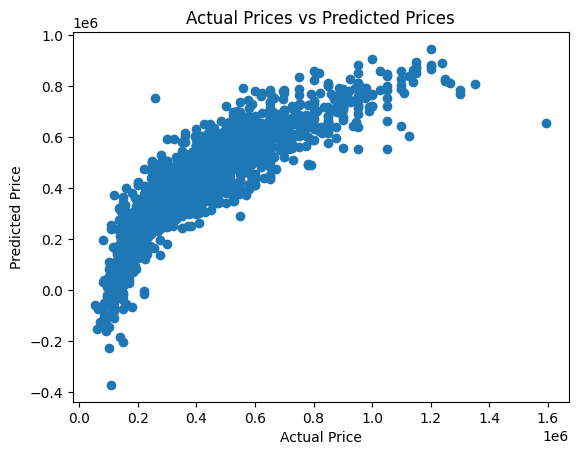

In [22]:
# Visualizing the actual prices and Predicted prices (Linear Regression)
plt.scatter(Y_train, training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

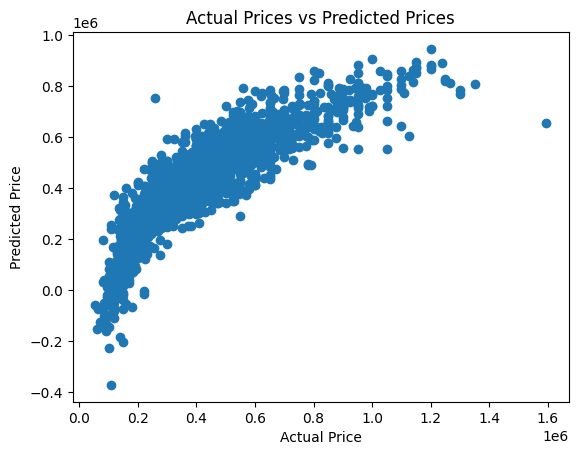

In [23]:
# Visualizing the actual prices and Predicted prices (Lasso Regression)
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

***Prediction on test data***

In [24]:
# Prediction on Test data
test_data_prediction1 = Linear_Regr_model.predict(X_test)

test_data_prediction2 = Lasso_Regr_model.predict(X_test)

# R squared Error (Linear regression Model)
error_score1 = metrics.r2_score(Y_test, test_data_prediction1)
print("R squared Error (Linear regression) : ", error_score1)

# R squared Error (Lasso regression Model)
error_score2 = metrics.r2_score(Y_test, test_data_prediction2)
print("R squared Error (Lasso regression) : ", error_score2)

R squared Error (Linear regression) :  0.7303714052203086
R squared Error (Lasso regression) :  0.7303685791703004


**VISUALIZATION ON TEST DATA: Actual price Against The Predicted Prices**

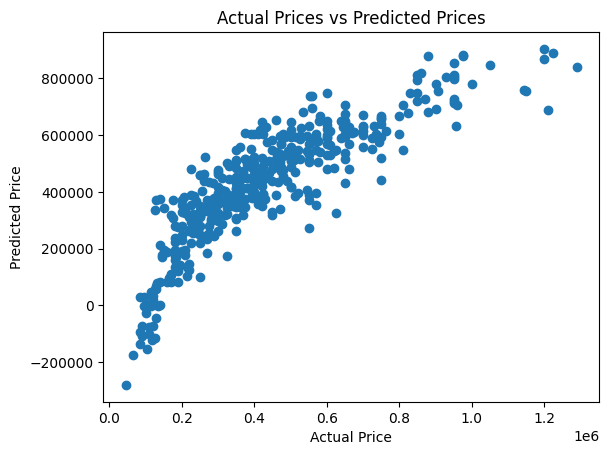

In [26]:
# Visualizing the actual prices and Predicted prices (Linear regression model)
plt.scatter(Y_test, test_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


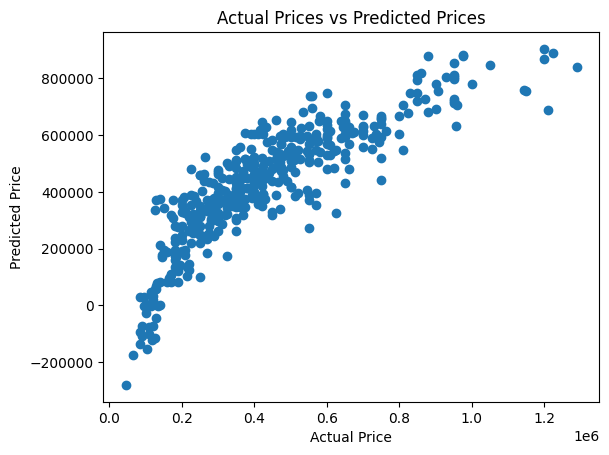

In [27]:
# Visualizing the actual prices and Predicted prices (Lasso regression model)
plt.scatter(Y_test, test_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

***BUILDING A PREDICTIVE SYSTEM***